# Report for Project 1 - Banana Collector

## 1. Learning Algorithm

#### The learning algorithms consits of a Deep Q Network (DQN) Agent that uses a Neural network to calculate the reward value.

* The Deep neural network has two hidden layers
* The network receives an input of size 37 which contains all the movements and sensors possibilities.
* The input is spread into a hidden layer of size 64, then to a second layer of size 64 and finally to the output layer (action layer) of size 4.
* The activation function used is ReLU
* The agent calls a class for Experience replay called ReplayBuffer. 


## 2. Plot of Rewards

### In this section we run the agent again to produce: 
* a plot of reward per episode 
* The number of episodes needed to solve the environment.

##### The agent class is in a external file called dqn_agent.py

#### Import libraries and start environment

In [1]:
from dqn_agent import *

from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

#### Train agent to plot reward

Episode 0	Average Score: 1.00
Episode 100	Average Score: 0.62
Episode 200	Average Score: 3.84
Episode 300	Average Score: 7.03
Episode 400	Average Score: 10.41
Episode 481	Average Score: 13.08Training over: it took 482 episodes to each an average score of: 13.08


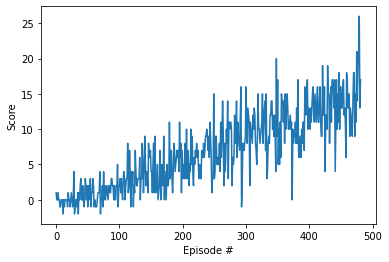

In [7]:
import torch
import matplotlib.pyplot as plt

agent = Agent(state_size=37, action_size=4, seed=0)

#This functions will train the agent until an average reward of 13 per 100 episodes is found
def dqn(eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    #--------------
     # get the default brain
#     brain_name = env.brain_names[0]
#     print('brain name: '.format(brain_name))
#     brain = env.brains[brain_name]
    #-------------
    action_size = brain.vector_action_space_size  # number of actions
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0] # examine the state space
    episode_counter = 0
    #---------------
    while True:    #Each one of this loop is an episode
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            #action = np.random.randint(action_size)        # select an action
            action = agent.act(state, eps)
            env_info = env.step(np.int32(action))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_counter, np.mean(scores_window)), end="")
        if episode_counter % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_counter, np.mean(scores_window)))
#            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
        episode_counter += 1
        if np.mean(scores_window) > 13.0:
            print('Training over: it took {} episodes to each an average score of: {}'
                  .format(episode_counter, np.mean(scores_window)))
            break
    return scores
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 3. Ideas for future work

* Change the structure of the existing network
* Implememt Dueling DQN
* Implement Double DQN
* Use a Convolutional Neural Network to analyse pixel data